# TP no 2 : k-plus proches voisins, analyse discriminante et régression logistique

## Génération artiﬁcielle de données
### Import :

In [105]:
from tp_knn_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d, ErrorCurve,
                           frontiere_new, LOOCurve)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, pairwise_distances
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn import metrics
from scipy import stats  # to use scipy.stats.mode
from sklearn import neighbors

### Question 1 : 
Étudiez les fonctions rand_bi_gauss, rand_tri_gauss, rand_clown et rand_checkers. Que renvoient ces fonctions? À quoi correspond la dernière colonne? Générez les données en utilisant chaque de ces 4 fonctions.

In [106]:
#Appel de la fonction rand_bi_gauss
n1 = 100
n2 = 100
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

#Appel de la fonction rand_tri_gauss
n1 = 100
n2 = 100
n3 = 100
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
sigma3 = [0.9, 0.9]
X2, y2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)

#Appel de la fonction rand_clown
n1 = 100
n2 = 100
sigma1 = 0.9
sigma2 = 0.9
X3, y3 = rand_clown(n1, n2, sigma1, sigma2)

#Appel de la fonction rand_checkers
n1 = 100
n2 = 100
sigma = 0.9
X4, y4 = rand_checkers(n1, n2, sigma)

Ces quatres fonctions renvoient un jeu de donnés. La derniere colonne correspond aux labels de ce jeu de donnés.

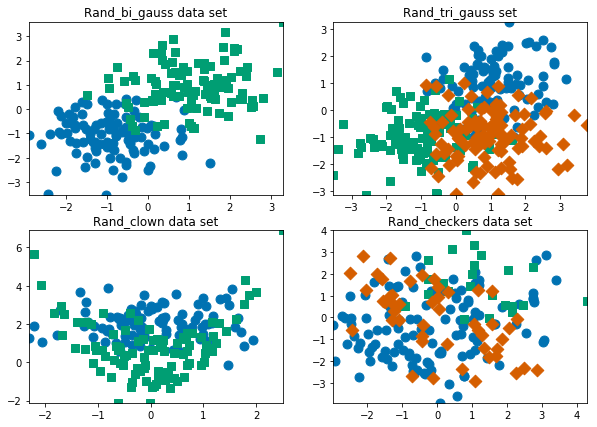

In [107]:
# Affichage des jeux de donnés générés précédements :

plt.show()
plt.close("all")
plt.ion()
plt.figure(1, figsize=(10, 7))
plt.subplot(221)
plt.title('Rand_bi_gauss data set')
plot_2d(X1, y1)

plt.subplot(222)
plt.title('Rand_tri_gauss set')
plot_2d(X2, y2)

plt.subplot(223)
plt.title('Rand_clown data set')
plot_2d(X3, y3)

plt.subplot(224)
plt.title('Rand_checkers data set')
plot_2d(X4, y4)

## Approche intuitive
L’algorithme des k-plus proches voisins (k-nn : pour k-nearest neighbors en anglais) est un algorithme intuitif, aisément paramétrisable pour traiter un problème de classiﬁcation avec un nombre quelconque d’étiquettes. 
### Question 3:

Pour ce qui est de la régression avec KNN, on pourrait prédire la valeur de x en lui affectant la valeur moyenne de ses plus proches voisins.

## Approche formelle
### Question 4:

In [108]:
class KNNClassifier(BaseEstimator, ClassifierMixin): 
    """ Homemade kNN classifier class """ 
    def __init__(self, n_neighbors=1): 
        # Complete the mehtod
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y): 
        # Complete the mehtod return self
        self.X_ = X
        self.y_ = y
        return self
    
    def predict(self, X): 
        # Complete the mehtod
        # nombre d'échantillons / nombres de features présente dans le vecteur X 
        nb_Ech, n_Features = X.shape
        
        #Calcul de la distance euclidienne entre la self.X_ et X
        #euclid_dist = euclidean_distances(X, self.X_) 
        #avec la fonction ci-dessus, cela ne fonctionne pas 
        euclid_dist = pairwise_distances(X, self.X_)
        
        #Le ndarray généré ci-dessus n'est pas trié en fopnction de la proximité:
        # Tri de l'array
        sort_euclid_dist = np.argsort(euclid_dist, axis = 1)
        
        # On cherche a determiner quels sont les plus propres voisins.
        #On va donc recupérer les indices de ces voisins :
        index_voisins = sort_euclid_dist[ : , : self.n_neighbors]
        
        # On va maintenant obtenir les labels de ces voisins : 
        labels_voisins = self.y_[index_voisins]
        
        # on va maintenant recuperer la prédiction :
        #mode, _ = stats.mode(index_voisins, axis=1)
        mode, _ = stats.mode(labels_voisins, axis=1)[0], stats.mode(labels_voisins)[1]
        # il faut maintenant transformer le format de mode qui n'est pas une liste : 
        prediction_y = np.asarray(mode.ravel(), dtype = np.intp)
        
        return prediction_y

Passons maintenant à la vérification de notre KNN classifieur. Pour cela, nous allons utiliser le jeu de donnés numéro 2 (i.e. celui de rand_tri_gauss)

In [109]:
# Définition du train set ainsi que tu test set
X_train = X2[::2]
Y_train = y2[::2].astype(int)
X_test = X2[1::2]
Y_test = y2[1::2].astype(int)


Classifier_homemade = KNNClassifier(n_neighbors=3)
Classifier_homemade.fit(X_train,Y_train)
true_KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=3) 
true_KNNClassifier.fit(X_train,Y_train)

y_pred_KNN_homemade= myKNNClassifier.predict(X_test)
y_pred_true_KNN = KNNClass.predict(X_test)

print("KNN Classifier homemade: \n " +str(np.isclose(y_pred1,Y_test)))
print("\n SCKIT LEARN KNN Classifier: \n"+ str(np.isclose(y_pred2,Y_test)))
print("\n Differences:\n  " +str(np.isclose(y_pred1,y_pred2)))

KNN Classifier homemade: 
 [False False  True False  True False  True False False False  True False
 False False False False  True  True False False  True  True False False
 False False  True False False False False  True False False False  True
  True False  True False False False  True False  True False  True  True
  True False  True False  True False False False  True  True  True  True
  True False  True False False False  True False False False False False
  True False False False False False  True  True False False False  True
 False False  True  True False False  True False False  True False False
 False False False  True False False False False False  True False False
 False False False False  True  True  True False False False False  True
 False False False False  True False  True  True False  True False False
 False False False  True  True  True False  True  True  True False False
  True False  True  True  True  True]

 SCKIT LEARN KNN Classifier: 
[False False  True False  Tr

On remarque que notre classifier KNN est bon!

### Question 5 :

In [110]:
#Création d'une fonction permettant d'utiliser plt2d et "frontière_new"
def plot_frontiere(X, y, step, alpha, nb_voisin) :
    
    X_train = X[::2]
    y_train = y[::2].astype(int)

    true_KNNClassifier = neighbors.KNeighborsClassifier(nb_voisin)
    true_KNNClassifier.fit(X_train, y_train)
  
    
    #création de la fonction de la frontière de decision :
    def decision_function (X):
        return true_KNNClassifier.predict(X.reshape(1, -1))
    
    plt.figure()
    plot_2d(X_train, y_train)
    frontiere_new(decision_function, X_train, y_train, w=None, step = step, alpha_choice = alpha)
    plt.title("Zone des "+ str(nb_voisin)+ " plus proche voisins " )

    


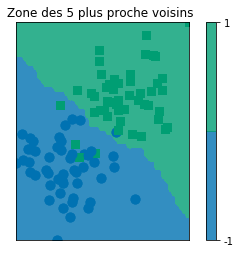

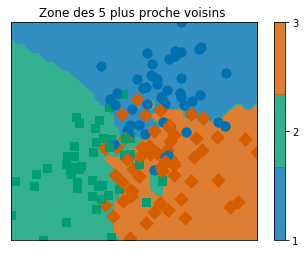

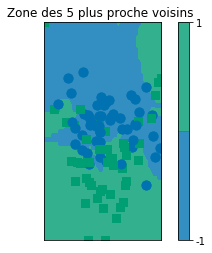

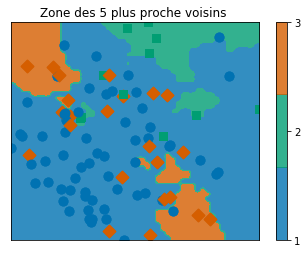

In [111]:
plot_frontiere(X1, y1, 50, 1, 5)
plot_frontiere(X2, y2, 50, 1, 5)
plot_frontiere(X3, y3, 50, 1, 5)
plot_frontiere(X4, y4, 50, 1, 5)


### Question 6 :

In [112]:
#Création d'une fonction permettant d'utiliser plt2d et "frontière_new"
def plot_frontiere_k_unfixed(X, y, step, alpha, nb_voisin_max) :
    
    X_train = X[::2]
    y_train = y[::2].astype(int)
    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    for k in range(1, nb_voisin_max + 1):
        
        true_KNNClassifier = neighbors.KNeighborsClassifier(k)
        true_KNNClassifier.fit(X_train, y_train)
  
    
        #création de la fonction de la frontière de decision :
        def decision_function (X):
            return true_KNNClassifier.predict(X.reshape(1, -1))
        
        
        plt.subplot(4, 4, 4 + k)
        plt.xlabel('k=%d' % k)
        plot_2d(X_train, y_train)
        frontiere_new(decision_function, X_train, y_train, w=None, step = step, alpha_choice = alpha)
        plt.title(str(k)+ " voisins " )
    plt.tight_layout()
    


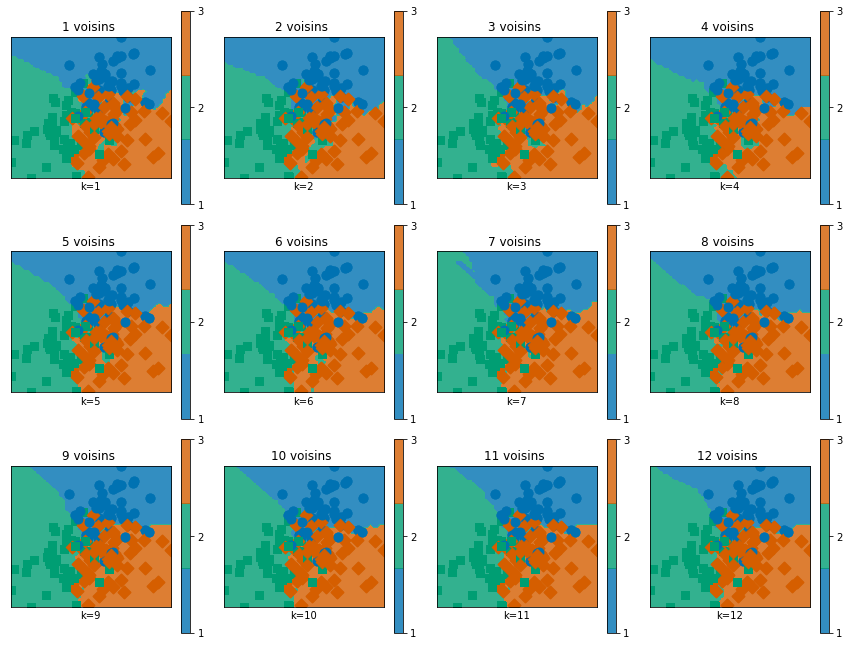

In [113]:
plot_frontiere_k_unfixed(X2, y2, 50, 1, 12)

Lorsque k=1, le classifier est affecté par le bruit présent dans les données (overtrainning). (Ces frontières sont donc complexes)

Lorsque k=n, le classifier défini des zones uniques en mettant de coté certaines sous-zones dues aux bruits. (Ces frontières sont donc simples)

### Question 7:

In [114]:
def weight_func(dist):
    
    """ Weight function to replace lambda d"""
    weight = []
    for j in range(-2, 2, 1):
        weight.append(np.exp(- dist ** 2 / 10**j))
    return weight

Text(0.5,1,'Plot avec weight')

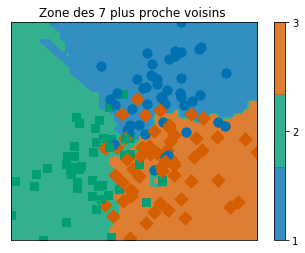

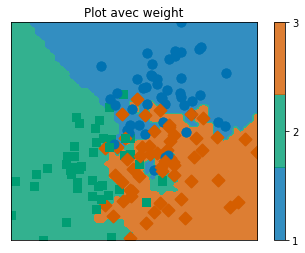

In [118]:
nb_voisin = 7
X_train = X2[::2]
y_train = y2[::2].astype(int)

plot_frontiere(X2, y2, 50, 1, 7)

def decision_function (X):
        return true_KNNClassifier.predict(X.reshape(1, -1))

WeightKNN = neighbors.KNeighborsClassifier(n_neighbors=nb_voisin, weights=weight_func)
WeightKNN.fit(X_train, y_train)
plt.figure()
plot_2d(X_train, y_train)
frontiere_new(decision_function, X_train, y_train, w=None, step = 50, alpha_choice = 1)
plt.title("Plot avec weight")

### Question 8 :

In [116]:
X_test = X2[1::2]
y_test = y2[1::2].astype(int)

KNN = neighbors.KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

erreur = (1 - KNN.score(X_test,y_test) ) *100

print("Le taux d'erreur, en pourcentage, pour k=1 est de : %.2f " %erreur + "%")

Le taux d'erreur, en pourcentage, pour k=1 est de : 32.00 %


### Question 9 :

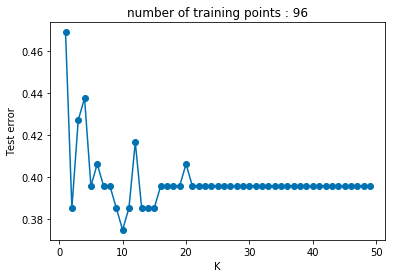

In [117]:
n1 = n2 = 50
sigma = 0.1
#X' et y4 proviennent de rand_checkers.
X_train = X4[::2]
y_train = y4[::2].astype(int)
X_test = X4[1::2]
y_test = y4[1::2].astype(int)

erreur = ErrorCurve(k_range=range(1,50))
erreur.fit_curve(X_train,y_train,X_test,y_test)
erreur.plot()

### Question 10 :

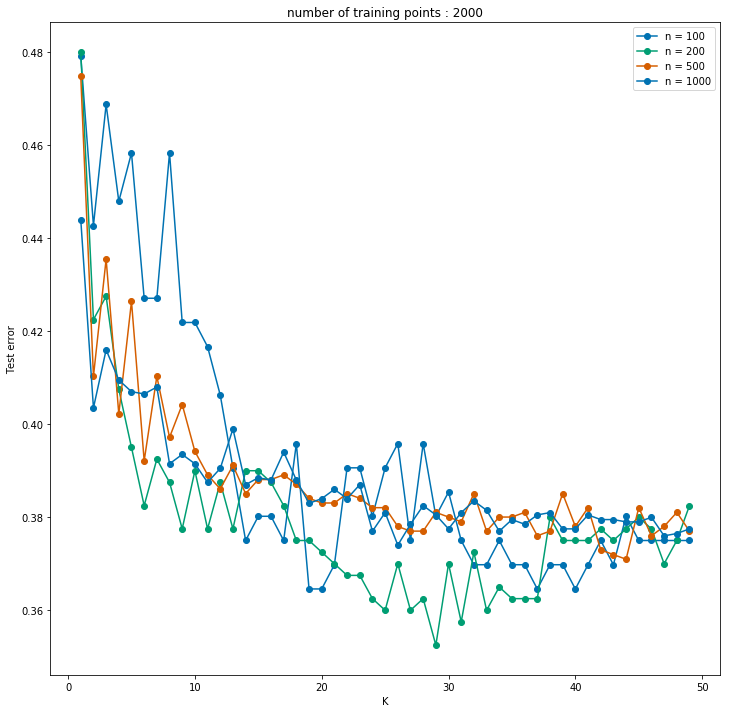

In [126]:
sigma = 0.9

plt.figure(figsize = (12,12))
n_list = [100, 200, 500, 1000]
erreur = ErrorCurve(k_range=range(1,50))

for n in range(len(n_list)):

    X_train, y_train = rand_checkers(n_list[n], n_list[n], sigma)
    X_test, y_test = rand_checkers(n_list[n], n_list[n], sigma)

    erreur.fit_curve(X_train, y_train, X_test, y_test)
    erreur.plot()
    plt.legend(["n = %d" % n for n in n_list])


Text(0.5,1,'visualisation des données')

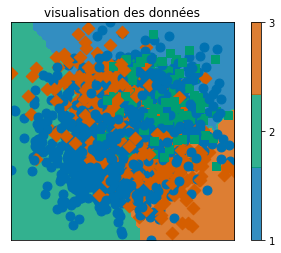

In [131]:
# pour n = 1000: 
sigma = 0.9
n=1000
erreur = ErrorCurve(k_range=range(1,50))
def decision_function (X):
        return true_KNNClassifier.predict(X.reshape(1, -1))
    
X_train, y_train = rand_checkers(n, n, sigma)
X_test, y_test = rand_checkers(n, n, sigma)

erreur.fit_curve(X_train, y_train, X_test, y_test)

frontiere_new(decision_function, X_train, y_train, w=None, step = 50, alpha_choice = 1)
#erreur.plot()
plt.title("visualisation des données")

### Question 11 :

La méthodedes KNN est couteuse en temps du fait du calcul de la distance séparant les nouveaux points des autres points du data set d'entrainement. Cette méthode est très simple à comprendre et donc simple à mettre en oeuvre. 

### Question 12 :

<class 'sklearn.utils.Bunch'>
Score : 0.9632925472747497


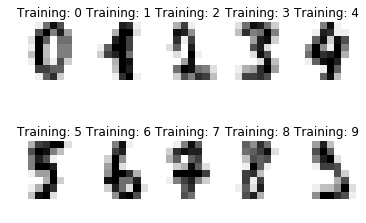

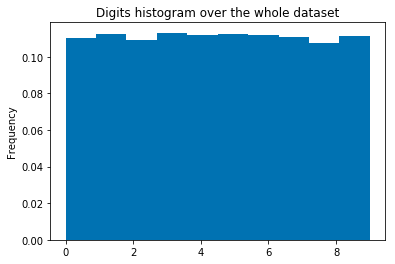

In [132]:
# The digits dataset:
from sklearn import datasets
digits = datasets.load_digits()

print(type(digits))
# Une Bunch est une sous-classe de dictionnaire 
# help(dict)
# "http://docs.python.org/2/library/stdtypes.html#mapping-types-dict"


plt.figure()
for index, (img, label) in enumerate(list(zip(digits.images, digits.target))[10:20]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None')
    plt.title('Training: %i' % label)

plt.figure()
plt.hist(digits.target,normed=True)
plt.title("Digits histogram over the whole dataset")
plt.ylabel("Frequency")


n_samples = len(digits.data)

X_train = digits.data[:n_samples // 2]
Y_train = digits.target[:n_samples // 2]
X_test = digits.data[n_samples // 2:]
Y_test = digits.target[n_samples // 2:]

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

score = knn.score(X_test, Y_test)
print('Score : %s' % score)